<a href="https://colab.research.google.com/github/randallscott25/Curriculum-Vitae/blob/master/Lab_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Randall Taylor Week 2 Lab 

The goal of this weeks lessons are garnered around the following methodologies:
Crawl phase of analytics we are looking at ways to descibe and model. Describing and modeling are not advanced analytics but they are the foundation for all of the other techniques we will use. 

The importance of OSEMN -- obtain, scrub, explore, model,and interpret. 
These five steps can guide us through both basic and advanced analytical tecniques:
Linear Regression 
Neural networks
Natural Language Processing 
This lab wil focus on exploring, modeling, and interpreting 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Predictive Model for Los Angeles Dodgers Promotion and Ateendance (Python)
#This is based upon the EXHIBIT 2.1 FROM MILLER (2015)

#import packages for: analysis and modeling 
import pandas as pd # this is for dataframe creation
import numpy as np # this is to estabilsh arrays and math functions 
from scipy.stats import uniform # for train-and-test split
import statsmodels.api as sm # statistical models (including regression )
import statsmodels.formula.api as smf # R-like model specification
import matplotlib.pyplot as plt #2D plotting 

import seaborn as sns #provides trellis and small multiple plotting

#read in the Dodgers bobbleheads data and create a dataframe 
dodgers = pd.read_csv("dodgers.csv")

# First you need to understand the structure of the dataframe 
print("\nContents of the Dodgers dataframe ----------------")
#attendance in the THOUSANDS (for plotting)
dodgers['attend_000'] = dodgers['attend']/1000

#print the first five rows of the dataframe
print(pd.DataFrame.head(dodgers))
dodgerDF = pd.DataFrame(dodgers)
#print(dodgerDF)
mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

#convert days' attendance into list of vectors for box plotting 

data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))


Contents of the Dodgers dataframe ----------------
  month  day  attend day_of_week  ... shirt  fireworks bobblehead attend_000
0   APR   10   56000     Tuesday  ...    NO         NO         NO     56.000
1   APR   11   29729   Wednesday  ...    NO         NO         NO     29.729
2   APR   12   28328    Thursday  ...    NO         NO         NO     28.328
3   APR   13   31601      Friday  ...    NO        YES         NO     31.601
4   APR   14   46549    Saturday  ...    NO         NO         NO     46.549

[5 rows x 13 columns]


At this point in the lab, we have read in the dataframe 

Summary Statistics
So let's look at the summary statistics. What are these summary statistics tell us? They give us a little insight into the range of our data. 
in the Juptyer Notesbooks example, there is more code than is needed in the colab session 


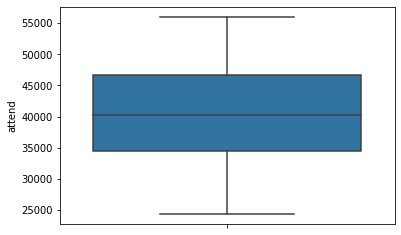

In [ ]:
## SUMMARY STATISTICS

np.mean(dodgers['attend'])
# np.min(dodgers['attend'])
# np.max(dodgers['attend'])

sns.boxplot(y="attend", data=dodgers)
#sns.plt.show()



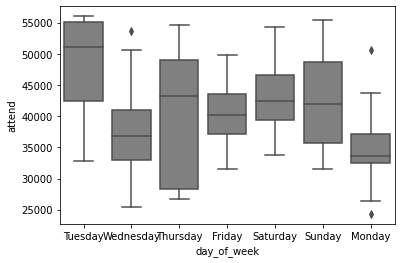

In [ ]:
sns.boxplot(x="day_of_week", y="attend", data=dodgers, color = "gray");
#g.add_legend();
#sns.plt.show()


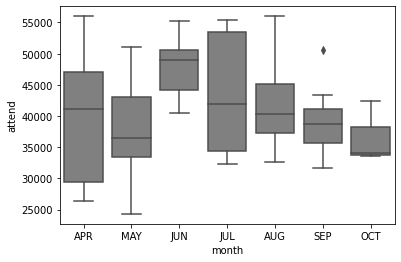

In [ ]:

# NUMBER OF PROMOTIONS - ONLY WORKS WITH BINARY VARIABLES

#cap = np.count_nonzero(dodgers['cap'])
#print(cap)
#shirt = np.count_nonzero(dodgers['shirt'])
#print(shirt)
#fire = np.count_nonzero(dodgers['fireworks'])
#print(fire)
#bob = np.count_nonzero(dodgers['bobblehead'])
#print(bob)

#print(cap + shirt + fire + bob)

sns.boxplot(x="month", y="attend", data = dodgers, color = "gray")
#g.add_legend();
#sns.plt.show()

In [ ]:

# NUMBER OF PROMOTIONS - ONLY WORKS WITH BINARY VARIABLES

cap = np.count_nonzero(dodgers['cap'])
print('Ball Cap totals are equal to: ', cap)
shirt = np.count_nonzero(dodgers['shirt'])
print('T-Shirt totals are equal to: ',shirt)
fire = np.count_nonzero(dodgers['fireworks'])
print('Games with Fireworks totals are equal to:', fire)
bob = np.count_nonzero(dodgers['bobblehead'])
print('Bobblehead nights totals are equal to: ', bob)

print('Grand Total of All Promotion items considered, are equal to: ',cap + shirt + fire + bob)



Ball Cap totals are equal to:  81
T-Shirt totals are equal to:  81
Games with Fireworks totals are equal to: 81
Bobblehead nights totals are equal to:  81
Grand Total of All Promotion items considered, are equal to:  324


The next portion of the lab is listed as exploratory data analysis. 
Per the lecture, some key take aways to considered 

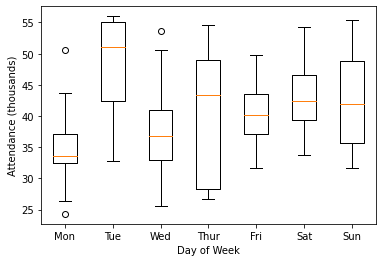

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

In [ ]:
#EDA : box plot for day of the week 
fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym = 'o', vert = 1, whis = 1.5)
plt.setp(day_plot['boxes'], color = 'black')
plt.setp(day_plot['whiskers'], color = 'black')
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
plt.show()
plt.savefig('fig_advert_promo_dodgers_eda_dat_of_week_Python.pdf',
            bbox_inches = 'tight', dpi = None, facecolor = 'w', edgecolor = 'b',
            transparent = True, pad_inches = 0.25, frameon = None)


Continuing with more exploratory data analysis. We're going to start looking at some trellis and lattice plots, as we discussed in the data review section. The intersection of these different variables are what give us better insight into the response and into the problem perhaps that we're trying to solve. And in this case, we're looking at game attendance


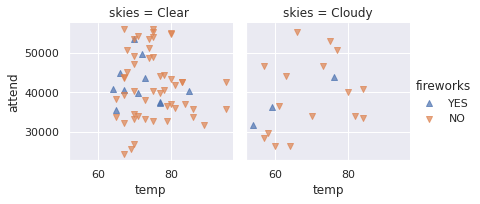

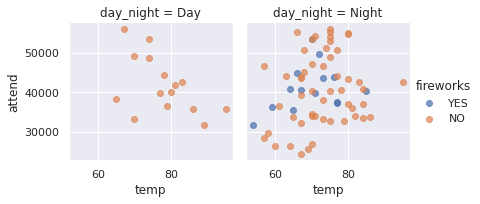

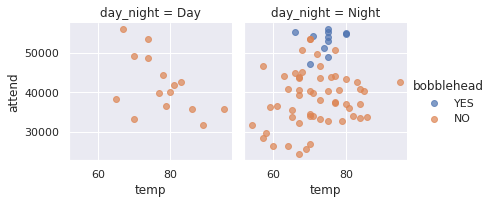

In [ ]:
#establishing a trellis/lattice plot by attendance and temperature, conditions upon skies
# and day_night with bobble head no / yes show in stinct colors


sns.set(style = "darkgrid")

g = sns.FacetGrid(dodgers, col= "skies", hue = "fireworks",
                  hue_order = ["YES", "NO"],
                  hue_kws = dict(marker = ["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha = .7)
g.add_legend();


g = sns.FacetGrid(dodgers, col= "day_night", hue = "fireworks",
                  hue_order = ["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha = .7)
g.add_legend();

g = sns.FacetGrid(dodgers, col= "day_night", hue = "bobblehead",
                  hue_order = ["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha = .7)
g.add_legend();

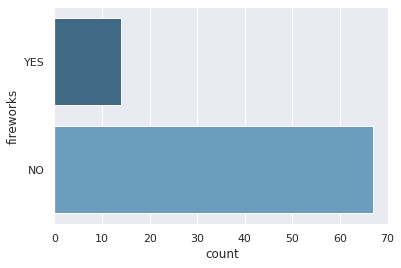

In [ ]:
#Dodger promotions bargraph(s) by 'type'
sns.countplot(y = 'fireworks', data = dodgers, palette = 'Blues_d',
              order = ['YES', 'NO'],)
g.add_legend();




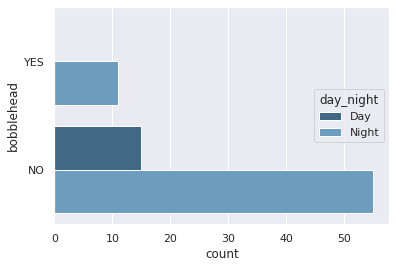

In [ ]:
sns.countplot(y = 'bobblehead', hue = 'day_night',
              data = dodgers, palette = 'Blues_d',
              order = ['YES','NO'])
g.add_legend();

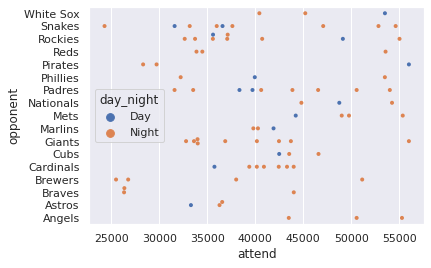

In [ ]:
#Dodgers attendance by visiting team 

#teams = sorted(['opponent'], reverse = True)
sns.swarmplot(x = 'attend', y = 'opponent', hue = 'day_night',
              data = dodgers, order = ordered_team_names, size = 4 )
g.add_legend()

Next to further explore the data we will create a histogram distribution of the data


Text(0, 0.5, 'Frequency')

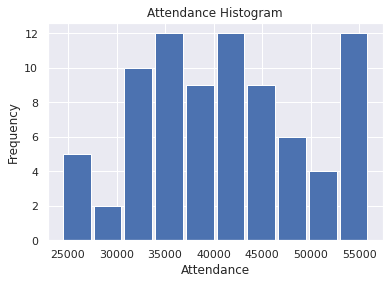

In [ ]:
#creating a histogram of attendance
## First I will need to create the bins required for this viz

plt.hist(dodgers['attend'],  stacked = False, rwidth = .9)
plt.title('Attendance Histogram')
plt.xlabel('Attendance')
plt.ylabel('Frequency')

## plt.show ## not required for colab 


The next bloc is for the ordering of data by the following criteria: 
Map 'day_of_week' to ordered_day_of_week
Map month to ordered_month



In [ ]:
# BLOCK FOR ORDERING DATA

# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)    



In [ ]:
print(dodgers)

   month  day  attend  ... attend_000 ordered_day_of_week  ordered_month
0    APR   10   56000  ...     56.000            2Tuesday         1April
1    APR   11   29729  ...     29.729          3Wednesday         1April
2    APR   12   28328  ...     28.328           4Thursday         1April
3    APR   13   31601  ...     31.601             5Friday         1April
4    APR   14   46549  ...     46.549           6Saturday         1April
..   ...  ...     ...  ...        ...                 ...            ...
76   SEP   29   40724  ...     40.724           6Saturday          6Sept
77   SEP   30   35607  ...     35.607             7Sunday          6Sept
78   OCT    1   33624  ...     33.624             1Monday           7Oct
79   OCT    2   42473  ...     42.473            2Tuesday           7Oct
80   OCT    3   34014  ...     34.014          3Wednesday           7Oct

[81 rows x 15 columns]


# Establishing Training and test regimen for model validation 
We're going to use this as we start to build our model. And this is definitely a piece of code that you're going to want to be able to look at and reuse as you go through making a training frame and a test frame. So all we're doing is splitting one third, two third. So we create this random seed, so we'll always have the same random numbers assigned to the data set. So our stuff is repeatable. 
We're adding this random number that we generated. If it's greater than this random number-- this random number is going to be somewhere between 0 and 1. If it's greater than 0.33, that's our training. 
So that's going to give us 2/3 of the data. And if it's less than 0.33, that's going to be our test. And that's what we're going to sort of check with. 



In [20]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33]
dodgers_test = dodgers[dodgers['runiform'] < 0.33]
# check training data frame
print('\ndodgers_train data frame (rows, columns): ',dodgers_train.shape)
print(dodgers_train.head())
# check test data frame
print('\ndodgers_test data frame (rows, columns): ',dodgers_test.shape)
print(dodgers_test.head())

# specify a simple model with bobblehead entered last
my_model = str('attend ~ ordered_month + ordered_day_of_week + bobblehead')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)



dodgers_train data frame (rows, columns):  (57, 16)
  month  day  attend  ... ordered_day_of_week ordered_month  runiform
1   APR   11   29729  ...          3Wednesday        1April  0.622109
2   APR   12   28328  ...           4Thursday        1April  0.437728
3   APR   13   31601  ...             5Friday        1April  0.785359
4   APR   14   46549  ...           6Saturday        1April  0.779976
7   APR   24   44014  ...            2Tuesday        1April  0.801872

[5 rows x 16 columns]

dodgers_test data frame (rows, columns):  (24, 16)
   month  day  attend  ... ordered_day_of_week ordered_month  runiform
0    APR   10   56000  ...            2Tuesday        1April  0.191519
5    APR   15   38359  ...             7Sunday        1April  0.272593
6    APR   23   26376  ...             1Monday        1April  0.276464
17   MAY   13   49124  ...             7Sunday          2May  0.013768
22   MAY   20   44005  ...             7Sunday          2May  0.075381

[5 rows x 16 columns]
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Model Interpretation 
The above models attendance(y)response variable : based upon the following variables: ordered_month, ordered_day_of_week, bobblehead.
To fit the model to the training set, ordinary least squares. (comeback, give more information)
Looking at the summary of the training set, the R-Squared identifies that the model, currently, accounts for over 50% of the variability inside -- or the uncertainity inside the data. 

Good model, not great. 

So if you will remember, the bobblehead's going to be coded as a 0 or a 1. So the coefficient that is on this bobblehead is basically saying, for every night we have a bobblehead, we're going to add about 10,000 people into the seats. So there is a standard error associated with that, about 2,600. 
But one thing we can do when looking at the coefficient, looking at the standard error, we can quickly make the assessment that all other things being equal, that this coefficient is probably valid because the standard error going over and the standard error going under is not going to take this to 0. We can confirm this by looking at the p-value. We've got a pretty low p-value. It's not a great p-value, but it's definitely significant at the 95% level. 




# FULL MODEL 
So we can run a full model. Might take a little bit longer but not too long. The full model, we added some more things into the data set. And again, we see the total estimated effect of the bobblehead promotion, about 10,000 people

In [39]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(dodgers_test['attend'].corr(dodgers_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of Bobblehead Promotion on Attendance: ',\
    round(my_model_fit.params[13],0))
    
# Suggestions for the student: Reproduce the figures in this chapter
# using matplotlib, ggplot, and/or rpy2 calls to R graphics. 
# Examine regression diagnostics for the fitted model.
# Examine other linear predictors and other explanatory variables.
# See if you can improve upon the model with variable transformations. 


Proportion of Test Set Variance Accounted for:  0.217
                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.08e-07
Time:                        18:10:57   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

So on the nights that we have the bobblehead, we probably get about 10,000 more people in the stands. If you recall from the lecture and the recommendation, each one of those people is worth about $35 for a ticket and about $39 in extra revenue from parking and souvenirs and food and beverages that they buy. So this is one way to take a simple data set using some describing techniques, using some linear model techniques. 
We can run through-- we can then put this back together with our observations, with our analysis. And we can make a recommendation to the business that, hey, we want to put about 10,000 more people in the stands in October. Maybe that's when we have the Vin Scully bobblehead. 


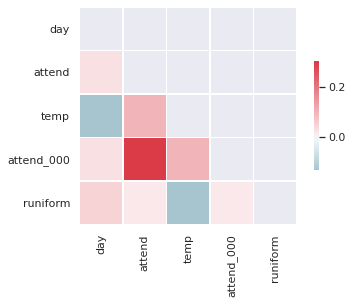

In [ ]:
corr = dodgerDF.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.plt.show()

# 2.9 Modeling
This is your opportunity to get hands on the keyboard and start exploring the data yourself. 

Using Python and the data provided, create at least:

one new graphic 
one new model 

that improves upon the model  presented in the lecture – please upload your ipynb file upon completion.

# 2.9 Student's answer to the following, provided below: 

> Examine regression diagnostics for the fitted model.

> using matplotlib, ggplot, and/or rpy2 calls to R graphics.

> Examine other linear predictors and other explanatory variables.
# See if you can improve upon the model with variable transformations.

# First 
I want to examine the current fitted model. Determinated upon those findings, I will endeavor to improve upon that model by selecting other independent variables as needed to improve the model 




The following libraries will need to be added to conduct proper diagnostics for the fitted model, as presented in the lecture. 


In [49]:
%matplotlib inline
#add the following libraries
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

First, let’s check if there is structure in the residuals relative to the fitted values. This plot is relatively straightforward to create. The plan here is to extract the residuals and fitted values from the fitted model, calculate a lowess smoothed line through those points, then plot. The annotations are the top three indices of the greatest absolute value of the residual.


In [42]:
print(my_model_fit.summary()) 


                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.08e-07
Time:                        18:12:27   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

# STUDENT ANSWER PART I 


    Examine regression diagnostics for the fitted model.

    using matplotlib, ggplot, and/or rpy2 calls to R graphics.


# Normality of the residuals
> Jarque-Bera test:
In statistics, the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.
printed with summary()
test for normal distribution of residuals



> Omni test: 
test for normal distribution of residuals

> Influence:
Class in stats.outliers_influence, most standard measures for outliers and influence are available as methods or attributes given a fitted OLS model. This is mainly written for OLS, some but not all measures are also valid for other models. Some of these statistics can be calculated from an

In [50]:
#Jarque_Bera test:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(my_model_fit.resid)
lzip(name, test)

[('Jarque-Bera', 5.907761339591404),
 ('Chi^2 two-tail prob.', 0.052136986430603445),
 ('Skew', 0.6535143287849495),
 ('Kurtosis', 3.205241059767305)]

In [51]:
#omni test:
name = ['Chi^2','Two-tail probability']
test = sms.omni_normtest(my_model_fit.resid)
lzip(name, test)

[('Chi^2', 6.342878616634644), ('Two-tail probability', 0.04194318526226341)]

# Influence Tests

Once created, and object of class OLSInfluence holds attributes and methods that allow users to assess the influence of each observation. 

Row labels for the observations in which the leverage, measured by the diagonal of the hat matrix, is high or the residuals are large, as the combination of large residuals and a high influence value indicates an influence point. The value of large residuals can be controlled using the alpha parameter. Large leverage points are identified as hat_i > 2 * (df_model + 1)/nobs.

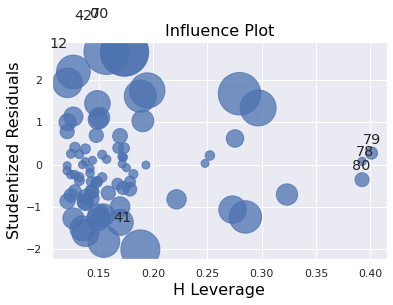

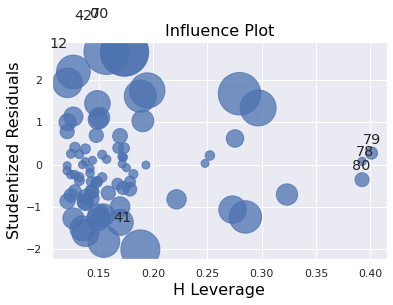

In [59]:
from statsmodels.stats.outliers_influence import OLSInfluence
#test_class = OLSInfluence(my_model_fit)
statsmodels.graphics.regressionplots.influence_plot(my_model_fit, external=True, alpha = 0.05, criterion='cooks', size=48,plot_alpha=0.75, ax=None)

# Student Answer Part II
Examine other linear predictors and other explanatory variables

In [74]:
print(dodgers[5:])

   month  day  attend  ... ordered_day_of_week ordered_month  runiform
5    APR   15   38359  ...             7Sunday        1April  0.272593
6    APR   23   26376  ...             1Monday        1April  0.276464
7    APR   24   44014  ...            2Tuesday        1April  0.801872
8    APR   25   26345  ...          3Wednesday        1April  0.958139
9    APR   27   44807  ...             5Friday        1April  0.875933
..   ...  ...     ...  ...                 ...           ...       ...
76   SEP   29   40724  ...           6Saturday         6Sept  0.416754
77   SEP   30   35607  ...             7Sunday         6Sept  0.535852
78   OCT    1   33624  ...             1Monday          7Oct  0.006209
79   OCT    2   42473  ...            2Tuesday          7Oct  0.300642
80   OCT    3   34014  ...          3Wednesday          7Oct  0.436893

[76 rows x 16 columns]


In [83]:
studentdf = dodgers.iloc[:, lambda dodgers: dodgers.columns.str.contains('attend|temp|bobblehead',
                                              case=False)]
print(studentdf)



    attend  temp bobblehead  attend_000
0    56000    67         NO      56.000
1    29729    58         NO      29.729
2    28328    57         NO      28.328
3    31601    54         NO      31.601
4    46549    57         NO      46.549
..     ...   ...        ...         ...
76   40724    84         NO      40.724
77   35607    95         NO      35.607
78   33624    86         NO      33.624
79   42473    83         NO      42.473
80   34014    82         NO      34.014

[81 rows x 4 columns]


The studentdf having been established, let us iterate it throght the train _ test 


In [85]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
studentdf['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(studentdf))
studentdf_train = studentdf[studentdf['runiform'] >= 0.33]
studentdf_test = studentdf[studentdf['runiform'] < 0.33]
# check training data frame
print('\nstudentdf_train data frame (rows, columns): ',studentdf_train.shape)
print(studentdf_train.head())
# check test data frame
print('\studentdf_test data frame (rows, columns): ',studentdf_test.shape)
print(studentdf_test.head())

# specify a simple model with bobblehead entered last
my_model = str('attend ~ temp + bobblehead + attend_000')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = studentdf_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
studentdf_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
studentdf_test['predict_attend'] = train_model_fit.predict(studentdf_test)



studentdf_train data frame (rows, columns):  (57, 5)
   attend  temp bobblehead  attend_000  runiform
1   29729    58         NO      29.729  0.622109
2   28328    57         NO      28.328  0.437728
3   31601    54         NO      31.601  0.785359
4   46549    57         NO      46.549  0.779976
7   44014    63         NO      44.014  0.801872
\studentdf_test data frame (rows, columns):  (24, 5)
    attend  temp bobblehead  attend_000  runiform
0    56000    67         NO      56.000  0.191519
5    38359    65         NO      38.359  0.272593
6    26376    60         NO      26.376  0.276464
17   49124    70         NO      49.124  0.013768
22   44005    77         NO      44.005  0.075381
                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [93]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(studentdf_test['attend'].corr(studentdf_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of Bobblehead Promotion on Attendance: ',\
    round(my_model_fit.params[3],0))


Proportion of Test Set Variance Accounted for:  1.0
                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.207e+30
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:08:00   Log-Likelihood:                 1894.8
No. Observations:                  81   AIC:                            -3782.
Df Residuals:                      77   BIC:                            -3772.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

# STUDENT CONCLUSIONS

I must have done something wrong to have obtained an R-squared: 1.00  hahahahaha =)

NOTE:


The dependant variable is indeed effected by the follow independent variables: 
bobblehead[T.YES]  -2.41e-11   6.86e-12     -3.514      0.001   -3.78e-11   -1.04e-11
temp              -9.948e-14   2.32e-13     -0.428      0.670   -5.62e-13    3.63e-13
attend_000         1000.0000   2.86e-13    3.5e+15      0.000    1000.000    1000.000

but again, it is too perfect. I must have goofed. 

In so much as the call of the question. 


> The student feels that they have met the requirement for turn in. 
